In [102]:
import requests
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
import geopy.geocoders as geocoders
import pandas as pd
import geocoder
from random import randint
import random
import time
import os
from unidecode import unidecode

import os
import zipfile
import requests
import numpy as np
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
import re
import geopy.geocoders as geocoders
import pandas as pd
import geocoder
from random import randint
import random
import time
import os
import fiona
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [103]:
list_result_files = os.listdir("output")

In [104]:
list_result_files

['drive-download-20230614T160933Z-001',
 'drive-download-20230614T160941Z-001',
 'drive-download-20230614T160955Z-001',
 'drive-download-20230614T161006Z-001',
 'drive-download-20230614T161024Z-001',
 'Results_0.csv',
 'results_124.csv',
 'results_19.csv',
 'results_29.csv',
 'results_39.csv',
 'results_40.csv',
 'results_55_segunda_ejecucion.csv',
 'results_62_67_9.csv',
 'results_67_71_7.csv',
 'results_7.csv',
 'results_72_primera_ejecucion.csv',
 'Results_finales_10000.csv',
 'Results_finales_10000_1.csv',
 'Results_finales_10000_2.csv',
 'Results_finales_10000_3.csv',
 'Results_finales_10000_4.csv',
 'Results_finales_10000_5.csv',
 'Results_finales_15000.csv',
 'Results_finales_15000_1.csv',
 'Results_finales_15000_2.csv',
 'Results_finales_15000_3.csv',
 'Results_finales_15000_4.csv',
 'Results_finales_15000_5.csv',
 'Results_finales_19999.csv',
 'Results_finales_20000.csv',
 'Results_finales_20000_1.csv',
 'Results_finales_20000_2.csv',
 'Results_finales_20000_3.csv',
 'Results_

In [105]:
df_list_results = [pd.read_csv("output/" + str(x)) for x in [x for x in list_result_files if "Results_finales" in str(x)]]

for i, x in enumerate(df_list_results):
    df_list_results[i].columns = ["address", "Latitude_arcgis", "Longitude_arcgis", "Confidence_arcgis", "latitude_nominatim", "longitude_nominatim", "Consecutivo"]
    #df_list_results = [df.columns = ["address", "Latitude_arcgis", "Longitude_arcgis", "Confidence_arcgis", "latitude_nominatim", "longitude_nominatim"] for df in df_list_results]

In [106]:
df_final_georef = pd.concat(df_list_results, axis = 0)

df_final_georef = df_final_georef.drop_duplicates()

df_final_georef = df_final_georef.sort_values(["Consecutivo" ,"address", "Confidence_arcgis"], ascending=[True, True, False]).drop_duplicates(["address", "Consecutivo"]).reset_index()
#print(df_final_georef.head())
print(df_final_georef.shape)
df_final_georef

df_final_georef.reset_index().drop("index", axis = 1)[(df_final_georef["address"].notnull()) & (df_final_georef["Latitude_arcgis"].notnull())]
# Split the 'Column' into three parts from the end
df_final_georef["address"] = df_final_georef["address"].str.replace(", BOGOTÁ, D.C.", ", BOGOTÁ D.C.").astype(str).apply(lambda x: unidecode(x))
df_final_georef["address"] = df_final_georef["address"].str.replace(", BOGOTA, D.C.", ", BOGOTA D.C.").astype(str).apply(lambda x: unidecode(x))

df_final_georef[['Direccion', 'Municipio', 'Departamento']] = df_final_georef['address'].astype(str).str.rsplit(',', n=2, expand=True)

df_final_georef['Municipio'] = df_final_georef['Municipio'].astype(str).str.strip()
df_final_georef['Departamento'] = df_final_georef['Departamento'].astype(str).str.strip()

df_final_georef['Municipio'] = df_final_georef['Municipio'].str.replace("BOGOTÁ D.C.", "BOGOTÁ, D.C.").astype(str).apply(lambda x: unidecode(x))
df_final_georef['Departamento'] = df_final_georef['Departamento'].str.replace("BOGOTÁ D.C.", "BOGOTÁ, D.C.").astype(str).apply(lambda x: unidecode(x))


df_final_georef.head(20)

(182248, 8)


,index,address,Latitude_arcgis,Longitude_arcgis,Confidence_arcgis,latitude_nominatim,longitude_nominatim,Consecutivo,Direccion,Municipio,Departamento
0,0,", ACACIAS, META",3.99116,-73.76388,1.0,3.988732,-73.767432,0,,ACACIAS,META
1,1,", ANAPOIMA, CUNDINAMARCA",4.57023,-74.52709,2.0,4.549301,-74.535912,1,,ANAPOIMA,CUNDINAMARCA
2,2,", ARMENIA, QUINDIO",4.53020,-75.68833,1.0,4.536307,-75.672375,2,,ARMENIA,QUINDIO
3,3,", ARMENIA, QUINDIO",4.53020,-75.68833,1.0,4.536307,-75.672375,3,,ARMENIA,QUINDIO
4,4,", BARRANQUILLA, ATLANTICO",10.98268,-74.83019,1.0,10.993870,-74.792718,4,,BARRANQUILLA,ATLANTICO
5,5,", BARRANQUILLA, ATLANTICO",10.98268,-74.83019,1.0,10.993870,-74.792718,5,,BARRANQUILLA,ATLANTICO
6,6,", BOGOTA D.C., BOGOTA D.C.",4.61496,-74.06941,1.0,4.672654,-74.058184,6,,BOGOTA D.C.,BOGOTA D.C.
7,7,", BOGOTA D.C., BOGOTA D.C.",4.61496,-74.06941,1.0,4.672654,-74.058184,7,,BOGOTA D.C.,BOGOTA D.C.
8,8,", BOJACA, CUNDINAMARCA",4.73363,-74.34119,2.0,4.687921,-74.325002,8,,BOJACA,CUNDINAMARCA
9,9,", BUCARAMANGA, SANTANDER",7.11711,-73.12924,1.0,7.125517,-73.118262,9,,BUCARAMANGA,SANTANDER


In [107]:
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "CARTAGENA DE INDIAS"), "Departamento"] = "BOLIVAR"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "MEDELLIN"), "Departamento"] = "ANTIOQUIA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "PEREIRA"), "Departamento"] = "RISARALDA"

# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "VILLAVICENCIO"), "Departamento"] = "META"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "JAMUNDI"), "Departamento"] = "VALLE DEL CAUCA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "BARRANQUILLA"), "Departamento"] = "ATLANTICO"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "SOACHA"), "Departamento"] = "CUNDINAMARCA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "DOSQUEBRADAS"), "Departamento"] = "RISARALDA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "PALMIRA"), "Departamento"] = "VALLE DEL CAUCA"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "MANIZALES"), "Departamento"] = "CALDAS"
# df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "VALLEDUPAR"), "Departamento"] = "CESAR"


df_final_georef.loc[(df_final_georef["Municipio"] == "SAN JOSE DE CUCUTA"), "Municipio"] = "CUCUTA"
#df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "SAN JOSE DE CUCUTA"), "Municipio"] = "CUCUTA"

#df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"].str.contains("CUCUTA"))]


#df_final_georef.loc[(df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")]


In [108]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
divipola = pd.read_excel("CODIGOS_DIVIPOLA.xlsx", "Listado Vigentes")

divipola["Nombre Municipio"] = divipola["Nombre Municipio"].astype(str).str.strip().apply(lambda x: unidecode(x))
divipola["Nombre Departamento"] = divipola["Nombre Departamento"].astype(str).str.strip().apply(lambda x: unidecode(x))

divipola["Código Municipio"] = divipola["Código Municipio"].astype(int).apply(round)
divipola["Código Departamento"] = divipola["Código Departamento"].astype(int).apply(round)


In [110]:
divipola_nodupkey = divipola[["Nombre Municipio", "Nombre Departamento"]].drop_duplicates()

Municipality = df_final_georef[(df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")][["Municipio"]].drop_duplicates()

divipola_nodupkey = divipola_nodupkey[divipola_nodupkey["Nombre Municipio"].isin(Municipality["Municipio"].to_list())].drop_duplicates(["Nombre Municipio"])

df_final_georef = pd.merge(df_final_georef, divipola_nodupkey, how = "left", left_on = ["Municipio"], right_on = ["Nombre Municipio"])
#.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")) & (df_final_georef["Municipio"] == "BOGOTA, D.C."), "Departamento"] = "BOGOTA, D.C."

In [111]:
df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")), "Departamento"] = df_final_georef.loc[((df_final_georef["Departamento"].isnull()) | (df_final_georef["Departamento"] == None) | (df_final_georef["Departamento"] == "None")), "Nombre Departamento"]

df_final_georef.drop(["Nombre Municipio","Nombre Departamento"], axis = 1,inplace = True)

In [112]:
df_final_georef_2 = pd.merge(df_final_georef, divipola[["Código Departamento","Código Municipio","Nombre Departamento","Nombre Municipio"]].drop_duplicates(), how = "left", left_on = ['Municipio', 'Departamento'], right_on = ["Nombre Municipio", "Nombre Departamento"])
df_final_georef_2[["Código Municipio", "Código Departamento"]] = df_final_georef_2[["Código Municipio", "Código Departamento"]].fillna(0)

df_final_georef_2["Código Municipio"] = df_final_georef_2["Código Municipio"].astype(int).apply(round)
df_final_georef_2["Código Departamento"] = df_final_georef_2["Código Departamento"].astype(int).apply(round)
df_final_georef_2.drop(["Nombre Municipio","Nombre Departamento"], axis = 1,inplace = True)
df_final_georef_2.head()

,index,address,Latitude_arcgis,Longitude_arcgis,Confidence_arcgis,latitude_nominatim,longitude_nominatim,Consecutivo,Direccion,Municipio,Departamento,Código Departamento,Código Municipio
0,0,", ACACIAS, META",3.99116,-73.76388,1.0,3.988732,-73.767432,0,,ACACIAS,META,50,50006
1,1,", ANAPOIMA, CUNDINAMARCA",4.57023,-74.52709,2.0,4.549301,-74.535912,1,,ANAPOIMA,CUNDINAMARCA,25,25035
2,2,", ARMENIA, QUINDIO",4.53020,-75.68833,1.0,4.536307,-75.672375,2,,ARMENIA,QUINDIO,63,63001
3,3,", ARMENIA, QUINDIO",4.53020,-75.68833,1.0,4.536307,-75.672375,3,,ARMENIA,QUINDIO,63,63001
4,4,", BARRANQUILLA, ATLANTICO",10.98268,-74.83019,1.0,10.993870,-74.792718,4,,BARRANQUILLA,ATLANTICO,8,8001


In [113]:

# folder_path_or = "2022_12/shp/"
# list_of_files = os.listdir(folder_path_or)

# for folder_path in ["2022_12/shp/" + x for x in list_of_files]:
#     # Loop through all the files in the folder
#     for file_name in os.listdir(folder_path):
#         file_path = os.path.join(folder_path, file_name)

#         # Check if the file is a zip file
#         if file_name.endswith('.zip'):
#             # Open the zip file
#             with zipfile.ZipFile(file_path, 'r') as zip_ref:
#                 # Extract all the contents to the same folder
#                 zip_ref.extractall(folder_path)



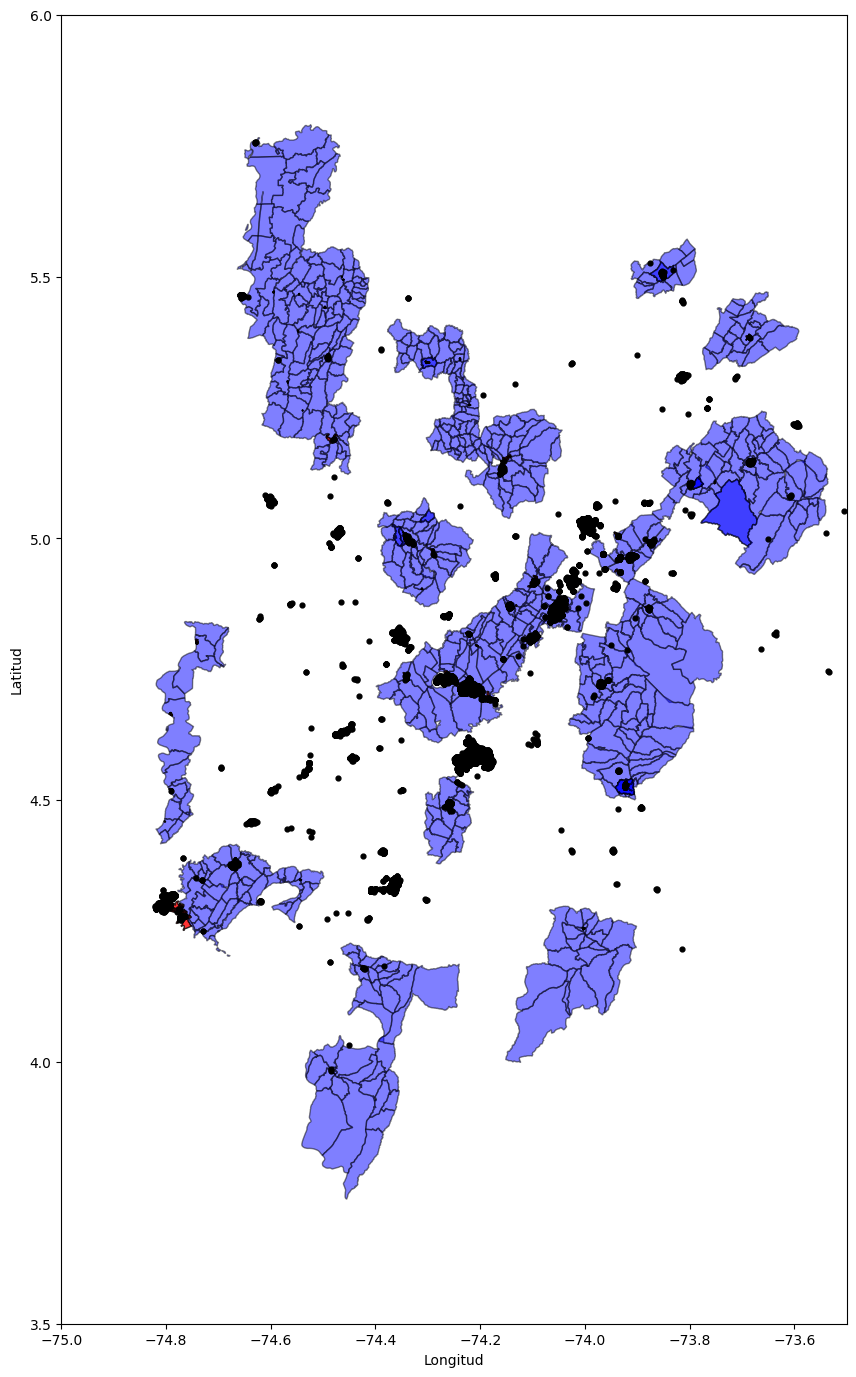

In [114]:
gdb = gpd.read_file("2022_12/shp/25/R_VEREDA/R_VEREDA.shp")
gdb_u_manzana = gpd.read_file("2022_12/shp/25/U_MANZANA/U_MANZANA.shp")
# Transform the coordinate system to EPSG:4326 (WGS84)
gdb = gdb.to_crs("EPSG:4326")
gdb_u_manzana = gdb_u_manzana.to_crs("EPSG:4326")

df_to_plot = df_final_georef_2[(df_final_georef_2["Código Departamento"].astype(int) == int(25)) & (df_final_georef_2["Longitude_arcgis"].notnull()) & (df_final_georef_2["Latitude_arcgis"].notnull())]

# Convert DataFrame to GeoDataFrame
points = gpd.GeoDataFrame(df_to_plot, geometry=gpd.points_from_xy(df_to_plot.Longitude_arcgis, df_to_plot.Latitude_arcgis))

# Check the transformed CRS
#print(gdb_2.crs)
# Create a plot
fig, ax = plt.subplots(figsize=(20, 17))

#plt.scatter(x = df_to_plot["Longitude_arcgis"], y = df_to_plot["Latitude_arcgis"])

# Plot the GeoDataFrame
ax.set_ylim(3.5, 6)
ax.set_xlim(-75, -73.5)
gdb.plot(ax=ax, color='blue', edgecolor='black', alpha = 0.5)
gdb_u_manzana.plot(ax=ax, color='red', edgecolor='black', alpha = 0.8)
points.plot(ax=ax, color='black', markersize =12)

# Add a title to the plot
ax.set_title('')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Display the plot
plt.show()



In [116]:
#df_final_georef_2[(df_final_georef_2["Código Departamento"] == 25) & (df_final_georef_2["Longitude_arcgis"]>-50)].to_csv("Ejemplo.csv")

def function_join_shp(dpto):
    df_to_plot = df_final_georef_2[(df_final_georef_2["Código Departamento"].astype(int) == int(dpto)) & (df_final_georef_2["Longitude_arcgis"].notnull()) & (df_final_georef_2["Latitude_arcgis"].notnull())]

    # Convert DataFrame to GeoDataFrame
    points = gpd.GeoDataFrame(df_to_plot, geometry=gpd.points_from_xy(df_to_plot.Longitude_arcgis, df_to_plot.Latitude_arcgis))

    if "U_TERRENO" in os.listdir("2022_12/shp/"+str(dpto)):
        gdb_u_terreno = gpd.read_file("2022_12/shp/"+str(dpto) +"/U_TERRENO/U_TERRENO.shp")
        gdb_u_terreno["CAPA"] = "TERRENO"
    else:
        gdb_u_terreno = gpd.read_file("2022_12/shp/"+str(dpto) +"/U_MANZANA/U_MANZANA.shp")
        gdb_u_terreno["CAPA"] = "MANZANA"

    if "R_TERRENO" in os.listdir("2022_12/shp/"+str(dpto)):
        gdb_r_terreno = gpd.read_file("2022_12/shp/"+str(dpto) +"/R_TERRENO/R_TERRENO.shp")
        gdb_r_terreno["CAPA"] = "TERRENO"
    else:
        gdb_r_terreno = gpd.read_file("2022_12/shp/"+str(dpto) +"/R_VEREDA/R_VEREDA.shp")
        gdb_r_terreno["CAPA"] = "TERRENO"

    
    
    # Transform the coordinate system to EPSG:4326 (WGS84)
    gdb_r_terreno = gdb_r_terreno.to_crs("EPSG:4326")
    gdb_u_terreno = gdb_u_terreno.to_crs("EPSG:4326")

    joined_r = gpd.sjoin(points, gdb_r_terreno, how='left', op='within')
    joined_u = gpd.sjoin(points, gdb_u_terreno, how='left', op='within')

    points_nearest_u = gpd.sjoin_nearest(points, gdb_u_terreno, distance_col="distances", how="left")
    points_nearest_r = gpd.sjoin_nearest(points, gdb_r_terreno, distance_col="distances", how="left")

    joined_r_df = joined_r[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA']].rename(columns = {'CODIGO' : "CODIGO_RURAL", 'CODIGO_ANT' : "CODIGO_ANT_RURAL", 'CAPA' : 'CAPA_RURAL'})
    joined_u_df = joined_u[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA']].rename(columns = {'CODIGO' : "CODIGO_URBANO", 'CODIGO_ANT' : "CODIGO_ANT_URBANO", 'CAPA' : 'CAPA_URBANO'})
    points_nearest_r_df = points_nearest_r[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA', "distances"]].rename(columns = {'CODIGO' : "CODIGO_RURAL_APROX", 'CODIGO_ANT' : "CODIGO_ANT_RURAL_APROX", 'CAPA' : 'CAPA_RURAL_APROX', "distances" : "Distancia_rural"}).sort_values(["Consecutivo", "address", "Confidence_arcgis", "Distancia_rural"], ascending=[True,True,False, True]).drop_duplicates(["Consecutivo", "address"])
    points_nearest_u_df = points_nearest_u[['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'CODIGO_ANT', 'CAPA', "distances"]].rename(columns = {'CODIGO' : "CODIGO_URBANO_APROX", 'CODIGO_ANT' : "CODIGO_ANT_URBANO_APROX", 'CAPA' : 'CAPA_URBANO_APROX', "distances" : "Distancia_urbano"}).sort_values(["Consecutivo", "address", "Confidence_arcgis", "Distancia_urbano"], ascending=[True,True,False, True]).drop_duplicates(["Consecutivo", "address"])

    df_final = pd.merge(
        pd.merge(
            pd.merge(joined_r_df, joined_u_df[["Consecutivo", "CODIGO_URBANO","CODIGO_ANT_URBANO",'CAPA_URBANO']], on = ["Consecutivo"], how = "left"),
        points_nearest_r_df[["Consecutivo", "CODIGO_RURAL_APROX","CODIGO_ANT_RURAL_APROX",'CAPA_RURAL_APROX', "Distancia_rural"]], on = ["Consecutivo"], how = "left"),
    points_nearest_u_df[["Consecutivo", "CODIGO_URBANO_APROX","CODIGO_ANT_URBANO_APROX",'CAPA_URBANO_APROX', "Distancia_urbano"]], on = ["Consecutivo"], how = "left")


    dict_result = {}
    dict_result["cruce_rural"] = joined_r
    dict_result["cruce_urbano"] = joined_u
    dict_result["mas_cercano_rural"] = points_nearest_r
    dict_result["mas_cercano_urbano"] = points_nearest_u
    dict_result["df_final"] = df_final


    return dict_result

#dpto = 25
dict_overall_results = {}
for dpto in os.listdir("2022_12/shp/"):
    dict_overall_results[str(dpto)] = function_join_shp(str(dpto))


C:\Users\Administrador\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3508: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_10012\1939692607.py:29: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined_r = gpd.sjoin(points, gdb_r_terreno, how='left', op='within')
C:\Users\Administrador\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3508: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Administrador\AppData\Local\Temp\

In [117]:
#print(dict_overall_results["08"]["df_final"].shape)
#dict_overall_results
# 'address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'VEREDA_COD', 'NUMERO_SUB', 'CODIGO_ANT', 'GLOBALID','codigo_mun', 'CODIGO_DEP', 'CAPA'
# 'address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'VEREDA_COD', 'NUMERO_SUB', 'CODIGO_ANT', 'GLOBALID','codigo_mun', 'CODIGO_DEP', 'CAPA', "distances"
# 'address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis', 'Consecutivo', 'Direccion', 'Municipio', 'Departamento', 'Código Departamento', 'Código Municipio', 'CODIGO', 'VEREDA_COD', 'NUMERO_SUB', 'CODIGO_ANT', 'GLOBALID','codigo_mun', 'CODIGO_DEP', 'CAPA', "distances"
vars = ['CODIGO_RURAL','CODIGO_ANT_RURAL', 'CODIGO_URBANO', 'CODIGO_ANT_URBANO','CAPA_URBANO', 'CODIGO_RURAL_APROX', 'CODIGO_ANT_RURAL_APROX','CAPA_RURAL_APROX', 'Distancia_rural', 'CODIGO_URBANO_APROX','CODIGO_ANT_URBANO_APROX', 'CAPA_URBANO_APROX', 'Distancia_urbano']
#'CAPA_RURAL', 
#CAPA_URBANO
#CAPA_RURAL_APROX
#CAPA_URBANO_APROX
df_final = []
for key_ in dict_overall_results.keys():
    df = dict_overall_results[key_]["df_final"].copy()
    df.loc[(dict_overall_results[key_]["df_final"]["CODIGO_RURAL"].isnull()) & (dict_overall_results["08"]["df_final"]["CODIGO_URBANO"].notnull()), vars]
    df["CODIGO_PREDIAL"] = None
    df["CAPA_GEOGRAFICA"] = None
    df["ZONA"] = None
    df.loc[df["CODIGO_RURAL"].notnull(), "CAPA_GEOGRAFICA"] = df.loc[df["CODIGO_RURAL"].notnull(), "CAPA_RURAL"]
    df.loc[df["CODIGO_RURAL"].notnull(), "CODIGO_PREDIAL"] = df.loc[df["CODIGO_RURAL"].notnull(), "CODIGO_RURAL"]
    df.loc[df["CODIGO_RURAL"].notnull(), "ZONA"] = "RURAL"


    df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "ZONA"] = "URBANO"
    df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CAPA_GEOGRAFICA"] = df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CAPA_URBANO"]
    df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CODIGO_PREDIAL"] = df.loc[(df["CODIGO_URBANO"].notnull()) & (df["CODIGO_PREDIAL"].isnull()), "CODIGO_URBANO"]

    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] < df["Distancia_urbano"]), "ZONA"] = "RURAL_APROX"
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] < df["Distancia_urbano"]), "CAPA_GEOGRAFICA"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] < df["Distancia_urbano"]), "CAPA_RURAL_APROX"]
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] < df["Distancia_urbano"]), "CODIGO_PREDIAL"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] < df["Distancia_urbano"]), "CODIGO_RURAL_APROX"]
    
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] > df["Distancia_urbano"]), "ZONA"] = "URBANA_APROX"
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] > df["Distancia_urbano"]), "CAPA_GEOGRAFICA"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] > df["Distancia_urbano"]), "CAPA_URBANO_APROX"]
    df.loc[(df["CODIGO_PREDIAL"].isnull()) & (df["Distancia_rural"] > df["Distancia_urbano"]), "CODIGO_PREDIAL"] = df.loc[(df["CODIGO_PREDIAL"].isnull())  & (df["Distancia_rural"] > df["Distancia_urbano"]), "CODIGO_URBANO_APROX"]


    df["Distancia_final"] = np.nan
    df.loc[df["ZONA"] == "URBANA_APROX", "Distancia_final"] = df.loc[df["ZONA"] == "URBANA_APROX", "Distancia_urbano"]
    df.loc[df["ZONA"] == "RURAL_APROX", "Distancia_final"] = df.loc[df["ZONA"] == "RURAL_APROX", "Distancia_rural"]
    df["TIPO_GEORREF"] = "EXACTA"
    df.loc[df["ZONA"].isin(["RURAL_APROX", "URBANA_APROX"]), "TIPO_GEORREF"] = "APROX"
    df_final.append(df)

In [ ]:
df_final_1 = pd.concat(df_final, axis = 0)
df_final_1["ZONA"].value_counts()

ZONA
RURAL_APROX     81104
URBANA_APROX    32608
URBANO          11460
RURAL             748
Name: count, dtype: int64

In [184]:
df_final_georef_2.shape

(182248, 13)

In [17]:
quantiles = [0.05,0.1, 0.2,0.25, 0.5, 0.75, 0.9, 0.95]
#df[df["TIPO_GEORREF"] == "APROX"]["Distancia_final"].quantile(quantiles)
df_final_1[df_final_1["ZONA"] == "RURAL_APROX"]["Distancia_final"].quantile(quantiles)



0.05    0.009175
0.10    0.019733
0.20    0.040180
0.25    0.047254
0.50    0.077015
0.75    0.147497
0.90    0.217502
0.95    0.232060
Name: Distancia_final, dtype: float64

In [18]:
df_final_1[df_final_1["ZONA"] == "URBANA_APROX"]["Distancia_final"].quantile(quantiles)


0.05    0.000006
0.10    0.000015
0.20    0.000030
0.25    0.000037
0.50    0.000073
0.75    0.008543
0.90    0.019833
0.95    0.031095
Name: Distancia_final, dtype: float64

In [211]:
df_final_1.columns

Index(['address', 'Latitude_arcgis', 'Longitude_arcgis', 'Confidence_arcgis',
       'Consecutivo', 'Direccion', 'Municipio', 'Departamento',
       'Código Departamento', 'Código Municipio', 'CODIGO_RURAL',
       'CODIGO_ANT_RURAL', 'CAPA_RURAL', 'CODIGO_URBANO', 'CODIGO_ANT_URBANO',
       'CAPA_URBANO', 'CODIGO_RURAL_APROX', 'CODIGO_ANT_RURAL_APROX',
       'CAPA_RURAL_APROX', 'Distancia_rural', 'CODIGO_URBANO_APROX',
       'CODIGO_ANT_URBANO_APROX', 'CAPA_URBANO_APROX', 'Distancia_urbano',
       'CODIGO_PREDIAL', 'CAPA_GEOGRAFICA', 'ZONA', 'Distancia_final',
       'TIPO_GEORREF'],
      dtype='object')

In [212]:
df_final_1.loc[df_final_1["ZONA"] == "RURAL", ["Latitude_arcgis", "Longitude_arcgis", "CODIGO_RURAL"]]

,Latitude_arcgis,Longitude_arcgis,CODIGO_RURAL
85,10.792307,-74.764555,086340002000000000023000000000
301,10.266670,-75.466670,138380001000000010360000000000
302,10.266670,-75.466670,138380001000000010360000000000
631,10.315560,-75.439980,138360001000000010444000000000
633,10.315560,-75.439980,138360001000000010444000000000
...,...,...,...
665,4.809005,-72.269931,851390001000000040170000000000
1111,5.161250,-72.546863,850100000000000010466000000000
1137,5.353010,-71.667340,853250000000000200008000000000
1176,5.330041,-72.409741,850010001000000190407000000000


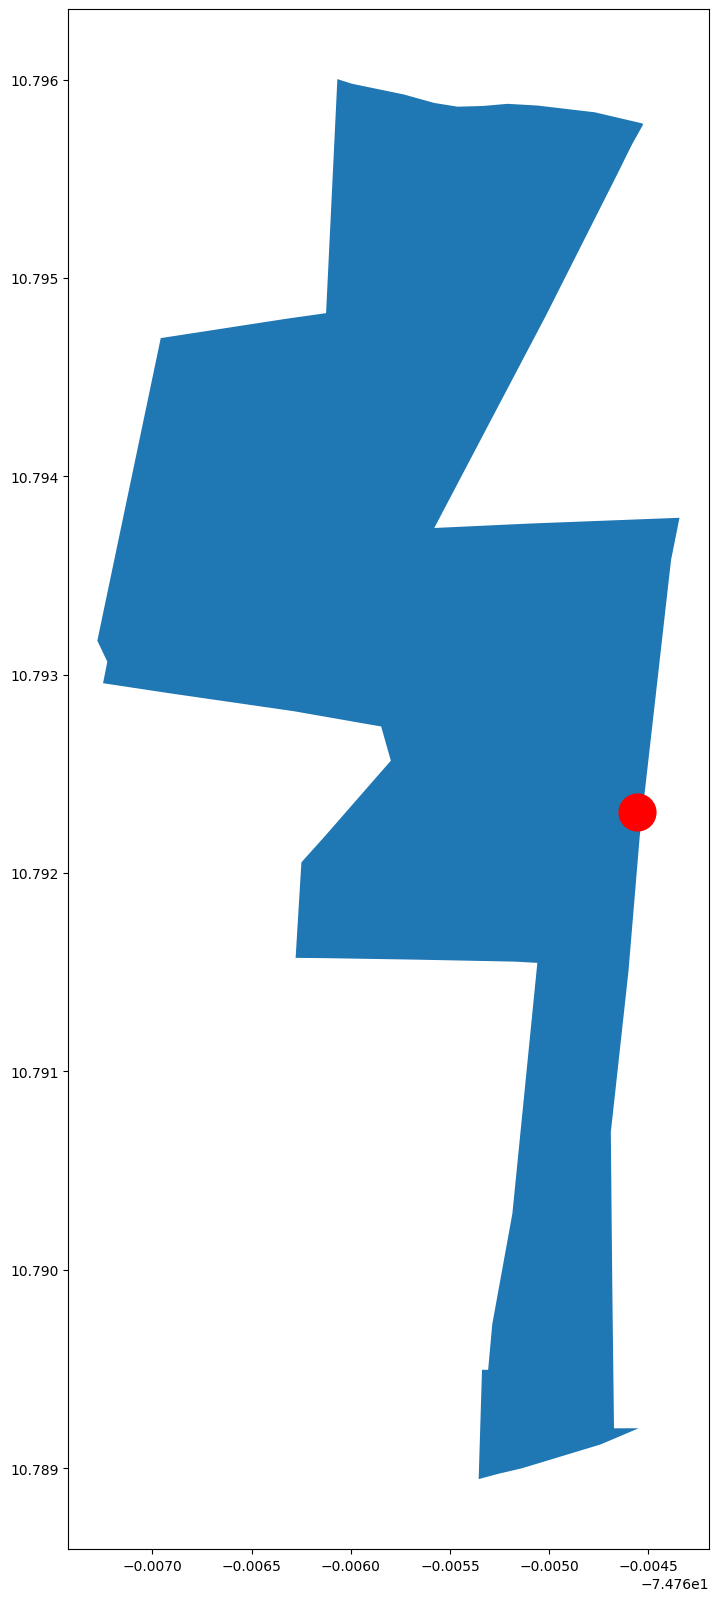

In [230]:
#df_final_1[df_final_1["ZONA"] == "RURAL"]

gdb = gpd.read_file("2022_12/shp/08/R_TERRENO/R_TERRENO.shp")
gdb = gdb.to_crs("EPSG:4326")
df_example = pd.DataFrame({"long" : [-74.764555]	, "lati": [10.792307]})
example_distances = gpd.GeoDataFrame(df_example, geometry=gpd.points_from_xy(df_example.long, df_example.lati))

fig, ax = plt.subplots(figsize=(15, 20))
gdb[gdb["CODIGO"] == "086340002000000000023000000000"].plot(ax=ax)
example_distances.plot(ax=ax, color = "red", markersize = 700)
plt.show()

In [80]:
ofertas = pd.read_excel("24052023_Consolidado_Avaluos.xlsx", "Hoja1")

pattern = r'[^a-zA-Z0-9]'
# Assuming 'df' is your DataFrame and 'Direccion' is the column name
ofertas['Direccion1'] = ofertas['Direccion'].str.extract(r'(\D*\d+\D*\d+\D*\d+)')
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace(pattern, ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace(" NO ", ' ')
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace(' N ', ' ')


# Function to count consecutive letters and numbers without spaces
def count_consecutive_alphanumeric(text):
    consecutive_alphanumeric = re.findall(r'[a-zA-Z0-9]+', text)
    max_length = max(len(word) for word in consecutive_alphanumeric)
    return max_length

# Function to insert spaces into the code
def insert_spaces(code):
    pattern = r'(\d+|\D+)'
    spaced_code = re.sub(pattern, r'\1 ', code).strip()
    return spaced_code

ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('AP\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('APT\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('AP\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('APT\d+', ' ', regex = True)

ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('CS\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('CS\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('CASA\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('CASA\d+', ' ', regex = True)

ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('TO\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('TO\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('TORRE\s\d+', ' ', regex = True)
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace('TORRE\d+', ' ', regex = True)


ofertas['Direccion2'] = ofertas['Direccion1'] + ", " +ofertas['Municipio_nombre'] + ", " + ofertas["Departamento_nombre"]
ofertas['Direccion2'] = ofertas['Direccion2'].str.replace(', BOGOTÁ, D.C., BOGOTÁ, D.C.', ', BOGOTÁ D.C., BOGOTÁ D.C.')
ofertas['Direccion2'] = ofertas['Direccion2'].astype(str).apply(lambda x: unidecode(x))
ofertas['Direccion1'] = ofertas['Direccion1'].str.replace(', BOGOTÁ D.C., BOGOTÁ D.C.', ', BOGOTÁ D.C.')
#ofertas['Direccion1'] = ofertas['Direccion1'].str.replace(', BOGOTÁ D.C., BOGOTÁ D.C.', ', BOGOTÁ D.C.')
ofertas['Direccion2'] = ofertas['Direccion2'].apply(lambda x: re.sub(r'\s{2,}', ' ', x.strip()))

list_directions = ofertas['Direccion2'].unique().tolist()
sorted_list = sorted(map(str, list_directions))
#sorted_list = [re.sub(r'\s{2,}', ' ', x.strip()) for x in sorted_list]
sorted_list = sorted(map(str, sorted_list))



In [81]:
df_address_or = pd.DataFrame({"addresses_or": sorted_list,
"Consecutivo": list(range(len(sorted_list)))})
df_address_or["Consecutivo"] = df_address_or["Consecutivo"].astype(int)
df_final_1["Consecutivo"] = df_final_1["Consecutivo"].astype(int)
df_final_2 = pd.merge(df_final_1, df_address_or, how = "left", on = ["Consecutivo"])


In [97]:
#df_final_georef_2["address"].head(50)
#df_address_or[~df_address_or["addresses_or"].isin(df_final_georef_2["address"])]
#x = df_final_1[~df_final_1["address"].isin(sorted_list)]["address"]
#x.shape

ofertas["Direccion2"] = ofertas["Direccion2"].astype(str)
df_final_1["address"] = df_final_1["address"].astype(str)
ofertas_final = pd.merge(ofertas, df_final_1, left_on = "Direccion2",right_on = "address", how = "left")
ofertas_final

,ID,Fuente,Anio,Mes,Departamento_x,Municipio_x,DIVIPOLA,Municipio_nombre,Departamento_nombre,gestorIGAC,...,Distancia_rural,CODIGO_URBANO_APROX,CODIGO_ANT_URBANO_APROX,CAPA_URBANO_APROX,Distancia_urbano,CODIGO_PREDIAL,CAPA_GEOGRAFICA,ZONA,Distancia_final,TIPO_GEORREF
0,1,A,2022,5,11,11001,11001.0,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A,2022,5,11,11001,11001.0,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,A,2022,9,11,11001,11001.0,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,A,2022,10,41,41001,41001.0,NEIVA,HUILA,No,...,0.013175,415240400000001030001000000000,41524040001030001000,TERRENO,0.016202,415240000000000260909000000000,TERRENO,RURAL_APROX,0.013175,APROX
4,5,A,2022,10,25,25473,25473.0,MOSQUERA,CUNDINAMARCA,Si,...,0.003000,254730100000000900016000000000,25473010000900016000,TERRENO,0.000000,254730100000000900016000000000,TERRENO,URBANO,NaN,EXACTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596861,503489,P,2022,4,76,001,76001.0,CALI,VALLE DEL CAUCA,No,...,0.237835,768690100000001050015000000000,76869010001050015000,TERRENO,0.253798,762480001000000030111000000000,TERRENO,RURAL_APROX,0.237835,APROX
596862,503490,P,2022,4,76,001,76001.0,CALI,VALLE DEL CAUCA,No,...,0.237835,768690100000001050015000000000,76869010001050015000,TERRENO,0.253798,762480001000000030111000000000,TERRENO,RURAL_APROX,0.237835,APROX
596863,503491,P,2022,4,76,001,76001.0,CALI,VALLE DEL CAUCA,No,...,0.237835,768690100000001050015000000000,76869010001050015000,TERRENO,0.253798,762480001000000030111000000000,TERRENO,RURAL_APROX,0.237835,APROX
596864,503492,P,2022,4,76,001,76001.0,CALI,VALLE DEL CAUCA,No,...,0.237835,768690100000001050015000000000,76869010001050015000,TERRENO,0.253798,762480001000000030111000000000,TERRENO,RURAL_APROX,0.237835,APROX


In [101]:
df_final_1["address"].value_counts()

address
CALLE 4 4 34, ALPUJARRA, TOLIMA          10
CL 60A 119 140, CALI, VALLE DEL CAUCA     8
KR 14 SUR 100 80, IBAGUE, TOLIMA          7
CL 19 7 135, CHIA, CUNDINAMARCA           7
CL 23 6 184, CAJICA, CUNDINAMARCA         7
                                         ..
CRA 11 11 43, RICAURTE, CUNDINAMARCA      1
CRA 102 A 130C 38, CHIA, CUNDINAMARCA     1
CRA 10 6 81, SOACHA, CUNDINAMARCA         1
CRA 10 3 99, APULO, CUNDINAMARCA          1
CRA 9 6 45, SANTA ROSALIA, VICHADA        1
Name: count, Length: 122175, dtype: int64

In [71]:
df_final_georef_2[df_final_georef_2["address"].str.contains("conjunto PRIMAVERA")]["address"]

182224    conjunto PRIMAVERA 6 39, BOGOTA D.C., BOGOTA D.C.
Name: address, dtype: object

In [252]:
sorted_list


['"CARRERA 86 # 34 - 50, CALI, VALLE DEL CAUCA',
 '"NAUTICA" CONJUNTO RESIDENCIAL P.H. QUE HACE PARTE DE RUITOQUE CONDOMINIO, KILOMETRO 3 EN LA VIA F/BLANCA - P/CUESTA LOTE 25 CASA 25, FLORIDABLANCA, SANTANDER',
 '# - LOTE NUMERO CINCO (5) MANZANA 16 ETAPA 2, ESPINAL, TOLIMA',
 '# ANILLO VIAL ORIENTAL N°10-725-CONJUNTO BARU APARTAMENTOS URBANIZACION VALLES DE BARU MUNICIPIO DE LOS PATIOS APARTAMENTO N°102, LOS PATIOS, NORTE DE SANTANDER',
 '# CONJUNTO CERRADO VENETTO CLUB HOUSE -P.H.- # UBICADO EN LA 55 NSA PR 7 +455, VILLA DEL ROSARIO, NORTE DE SANTANDER',
 '# DIREC: TORRE 6 -APARTAMENTO 103-(T6, APARTADÓ, ANTIOQUIA',
 '# GIRASOLES DEL TAMBO SEGUNDO PISO APARTAMENTO NO. 202 CALLE 24 NO. 23, LA CEJA, ANTIOQUIA',
 '# VIS CONJUNTO 3 A.R.P.H. SEGUNDA ETAPA BLOQUE J APARTAMENTO 425, CARTAGENA DE INDIAS, BOLÍVAR',
 ') # CONJUNTO CERRADO VENETTO CLUB HOUSE -P.H.- # UBICADO EN LA 55 NSA PR 7 +455, VILLA DEL ROSARIO, NORTE DE SANTANDER',
 ') CARRERA 65 #25A 13, ITAGÜÍ, ANTIOQUIA',
 '-CARRERA 1

In [233]:
list_directions = ofertas['Direccion2'].unique().tolist()
sorted_list = sorted(map(str, list_directions))
sorted_list = [re.sub(r'\s{2,}', ' ', x.strip()) for x in sorted_list]
sorted_list = sorted(map(str, sorted_list))


In [234]:
len(sorted_list)

202163

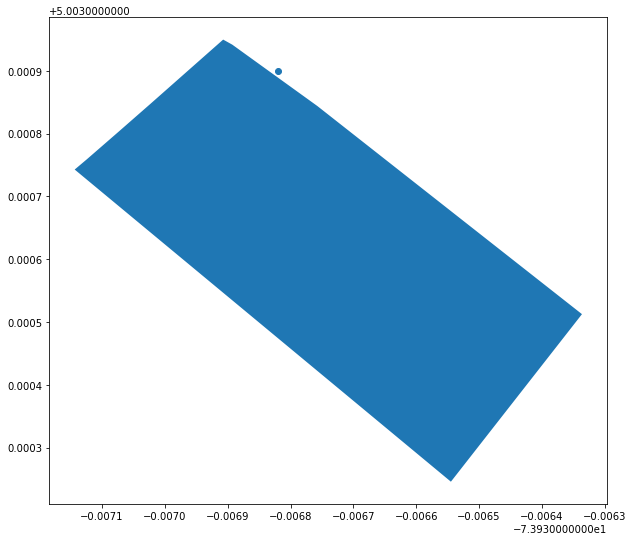

In [100]:
df_example = pd.DataFrame({"long" : [-73.93682]	, "lati": [5.00390]})
example_distances = gpd.GeoDataFrame(df_example, geometry=gpd.points_from_xy(df_example.long, df_example.lati))

fig, ax = plt.subplots(figsize=(10, 12))
gdb_u_terreno[gdb_u_terreno["CODIGO"] == "258170500000000050014000000000"].plot(ax=ax,)
example_distances.plot(ax=ax)
plt.show()

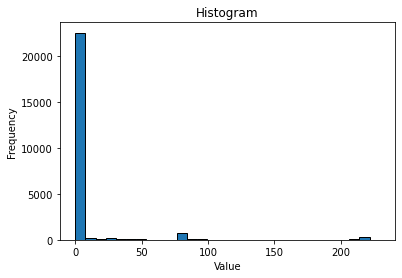

0.05    0.000000
0.10    0.000007
0.20    0.000116
0.25    0.000116
0.50    0.018754
0.75    0.066336
0.90    2.662672
Name: distances, dtype: float64


In [84]:
# Plot the histogram
plt.hist(points_distance["distances"], bins=30, edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

# Calculate multiple quantiles
quantiles = [0.05,0.1, 0.2,0.25, 0.5, 0.75, 0.9]
result = points_distance["distances"].quantile(quantiles)
print(result)

In [152]:
#df_final_georef[]
#df_final_georef.reset_index().tail
df_final_georef_realizados = df_final_georef[(df_final_georef["Latitude_arcgis"].notna()) & (df_final_georef["Longitude_arcgis"].notna())]
df_final_georef_no_realizados = df_final_georef[(df_final_georef["Latitude_arcgis"].isna()) & (df_final_georef["Longitude_arcgis"].isna())]
#df_final_georef["Longitude_arcgis"].notnull()

# Function to count consecutive letters and numbers without spaces
def count_consecutive_alphanumeric(text):
    consecutive_alphanumeric = re.findall(r'[a-zA-Z0-9]+', text)
    max_length = max(len(word) for word in consecutive_alphanumeric)
    return max_length

# Function to insert spaces into the code
def insert_spaces(code):
    pattern = r'(\d+|\D+)'
    spaced_code = re.sub(pattern, r'\1 ', code).strip()
    return spaced_code



# Apply the function to the 'Text' column
df_final_georef_no_realizados['Consecutive_Alphanumeric_Count'] = df_final_georef_no_realizados['address'].apply(count_consecutive_alphanumeric)
df_final_georef_no_realizados['address_2'] = df_final_georef_no_realizados['address'].apply(insert_spaces)

df_final_georef_no_realizados.loc[df_final_georef_no_realizados['Consecutive_Alphanumeric_Count']>12, "address"] = df_final_georef_no_realizados.loc[df_final_georef_no_realizados['Consecutive_Alphanumeric_Count']>12, "address_2"]



C:\Users\Administrador\AppData\Local\Temp\ipykernel_19300\597262805.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_georef_no_realizados['Consecutive_Alphanumeric_Count'] = df_final_georef_no_realizados['address'].apply(count_consecutive_alphanumeric)
C:\Users\Administrador\AppData\Local\Temp\ipykernel_19300\597262805.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_georef_no_realizados['address_2'] = df_final_georef_no_realizados['address'].apply(insert_spaces)


In [153]:
df_final_georef_no_realizados[df_final_georef_no_realizados["address"].str.contains("AP\d", regex=True)]
#df_final_georef_no_realizados["address"].iloc[500:600]
#df_final_georef_no_realizados["address"][56270]#.iloc[]

,address,Latitude_arcgis,Longitude_arcgis,Confidence_arcgis,latitude_nominatim,longitude_nominatim,Consecutive_Alphanumeric_Count,address_2
437,"CL1011 18SURAP736, MOSQUERA",NaN,NaN,NaN,NaN,NaN,10,"CL 1011 18 SURAP 736 , MOSQUERA"
9396,"AP102 BQ5 PQ7, DOSQUEBRADAS",NaN,NaN,NaN,NaN,NaN,12,"AP 102 BQ 5 PQ 7 , DOSQUEBRADAS"
10163,"AP201 GJ1 CL8, PEREIRA",NaN,NaN,NaN,NaN,NaN,7,"AP 201 GJ 1 CL 8 , PEREIRA"
11585,"AP417 PQ8 CL8, CARTAGO",NaN,NaN,NaN,NaN,NaN,7,"AP 417 PQ 8 CL 8 , CARTAGO"
11726,"AP501 TO11 VAR CHIA COTA NARANJOS 1, CHÍA",NaN,NaN,NaN,NaN,NaN,8,"AP 501 TO 11 VAR CHIA COTA NARANJOS 1 , CHÍA"
12457,"AP7B PQ40 DP28, CARTAGENA DE INDIAS",NaN,NaN,NaN,NaN,NaN,9,"AP 7 B PQ 40 DP 28 , CARTAGENA DE INDIAS"
12638,"AP901 PQ8 PQ9, PEREIRA",NaN,NaN,NaN,NaN,NaN,7,"AP 901 PQ 8 PQ 9 , PEREIRA"
18792,"AV EL PROGRESO 9 03 SUR AP502, TUNJA",NaN,NaN,NaN,NaN,NaN,8,"AV EL PROGRESO 9 03 SUR AP 502 , TUNJA"
20381,"AVELCAUCHO CL823870TOA AP1301GJ010, PEREIRA",NaN,NaN,NaN,NaN,NaN,11,"AVELCAUCHO CL 823870 TOA AP 1301 GJ 010 , PEREIRA"
20848,"AVPRADILLA6A 09 AP3, CHÍA",NaN,NaN,NaN,NaN,NaN,12,"AVPRADILLA 6 A 09 AP 3 , CHÍA"


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = df_final_georef_no_realizados["address"].replace("\d*[a-z]*\s|[a-z]*\d*\s|[A-Z]*\d*\s", "", regex=True).replace("\d\w", "", regex=True)

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the corpus and transform the corpus into a bag of words representation
bag_of_words = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names()

# Calculate the total count of each word in the corpus
word_counts = np.sum(bag_of_words, axis=0).A1

# Create a dictionary of word counts
word_count_dict = dict(zip(feature_names, word_counts))

# Sort the dictionary by counts in descending order
sorted_word_count = sorted(word_count_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted word counts
print("Word Counts (Descending Order):")
for word, count in sorted_word_count:
    print(f"{word}: {count}")

Word Counts (Descending Order):
chía: 164
dosquebradas: 51
pereira: 47
indias: 44
bogotá: 37
cl9: 20
bello: 16
cali: 16
medellín: 15
envigado: 13
cajicá: 9
manizales: 9
armenia: 7
cs: 7
soacha: 7
tunja: 7
villavicencio: 7
barranquilla: 6
cartago: 6
kraap: 6
candelaria: 5
etp1: 5
tocancipá: 5
cr: 4
jamundí: 4
mz8: 4
sabaneta: 4
ap2: 3
ap4: 3
bucaramanga: 3
etp4: 3
flandes: 3
ibagué: 3
josécúcuta: 3
lt: 3
marta: 3
montería: 3
turbaco: 3
zipaquirá: 3
ap: 2
ap3: 2
b1: 2
ciénaga: 2
cl8: 2
clb: 2
colombia: 2
cota: 2
etp5: 2
facatativá: 2
floridablanca: 2
gj: 2
itagüí: 2
kra9: 2
krcsur7: 2
ltetdpredruralsinnomenclaturacs: 2
ltzurbvillaolimpica2: 2
líbano: 2
m1: 2
multiplzcoralesapgjdp9: 2
mxokr5: 2
mz: 2
mz6: 2
mzpn: 2
mzsr: 2
patios: 2
piedecuesta: 2
pq4: 2
pq5: 2
rionegro: 2
sibaté: 2
tp8: 2
ubaté: 2
ap1: 1
aplr: 1
app: 1
apt3: 1
aptopqp0: 1
aptq4: 1
apttoiso: 1
avcircunvalarclblap1: 1
avdelcauchocletoeapto: 1
avdelcauchocllenb: 1
avkrbisc: 1
avppi: 1
avpradillap3: 1
avunivp: 1
belalcázar: 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data
#X, _ = make_blobs(n_samples=100, centers=4, random_state=42)
X = df_final_georef[["Latitude_arcgis", "Longitude_arcgis"]]
# Initialize a range of cluster numbers to evaluate
cluster_range = range(2, 5)

# Lists to store the distortion and silhouette scores
distortions = []
silhouette_scores = []

# Perform K-means clustering for different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    # Append the distortion to the list
    distortions.append(kmeans.inertia_)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the distortion and silhouette scores
plt.figure(figsize=(10, 4))

# Plotting the distortion
plt.subplot(1, 2, 1)
plt.plot(cluster_range, distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').